# How Not To Put A Nation To Sleep
## Blake Whittington and Gabriele Spiridaviciute
***
## Are People a Good Judge of Their Own Sleep and Health?
### Tobacco Intake
In this notebook we want to see how tobacco affects how people see their health.<br>
• We will if people's health rating corresponds with their smoking status.<br>
• We want to investigate how various social factors play a role on peoples tobacco intake.

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

## Parameters
Here we will load in the files needed in our notebook.<br>
One parameter contains the directory of the clean version of our 2013 "Health and Sleep" Sleep Foundation Survey<br>
The other contains the directory to our dataset containing recommended standards for various substances

In [2]:
clean_2013_POLLDATASET = '../data_file/cleaned_data_csv/clean_2013_POLLDATASET.csv'
substance_DATASET = '../data_file/recommendation_data/substance_limit.csv'

## Load Cleaned Dataset
Our data is in CSV format so we will use the Pandas .read_csv()

In [3]:
clean_2013Poll = pd.read_csv(clean_2013_POLLDATASET)

## Examine Contents of Our Clean Dataset
We want to ensure that the csv file was read in correctly.<br>
We will print the data frame and its unique columns available

In [4]:
display(clean_2013Poll)
print(clean_2013Poll.columns.values)
print(f"\nclean_2013Poll has {len(clean_2013Poll.columns.values)} columns.\nclean_2013Poll shape : {clean_2013Poll.shape}")

,id,age,employment_status,gender,state,bed_time_weekdays,wake_up_weekdays,bed_time_wrong,wake_up_wrong,time_awake_wrong,...,marital_status,education_level,annual_household_income,hispanic,race,bed_time_weekend_wrong,wake_up_weekend_wrong,total_height_inch,bmi,regions
0,1,39,3,Male,CO,14,17,1000.0,2050.0,1050.0,...,single,Highschool,Less than $25k,2,White/Caucasian,1000.0,2050.0,73.0,20.98,West
1,2,57,1,Female,AL,10,7,900.0,1800.0,900.0,...,married_or_partnered,Bachelor's Degree,Over $100k,2,White/Caucasian,2100.0,2100.0,69.0,34.70,South
2,3,51,1,Male,NV,14,9,1000.0,1850.0,850.0,...,separated,Associate's Degree,$25k-$50k,2,White/Caucasian,1000.0,1900.0,74.0,25.03,West
3,3,38,1,Male,FL,15,10,1025.0,1875.0,850.0,...,single,Master's Degree,Refused,2,White/Caucasian,1100.0,2000.0,71.0,NaN,South
4,4,60,1,Male,CT,18,8,1100.0,1825.0,725.0,...,married_or_partnered,Some College,Over $100k,2,White/Caucasian,1100.0,2050.0,69.0,22.89,Northeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,956,43,2,Female,NY,18,15,1100.0,2000.0,900.0,...,married_or_partnered,Some College,$50k-$75k,2,White/Caucasian,1100.0,2000.0,64.0,19.39,Northeast
996,959,26,1,Male,NY,2,13,1201.7,1950.0,748.3,...,married_or_partnered,Master's Degree,Less than $25k,2,White/Caucasian,1400.0,2200.0,63.0,23.03,Northeast
997,963,45,1,Female,NY,18,11,1100.0,1900.0,800.0,...,married_or_partnered,Master's Degree,$75k-$100k,2,White/Caucasian,1200.0,2050.0,67.0,22.86,Northeast
998,964,53,1,Male,NE,16,7,1050.0,1800.0,750.0,...,married_or_partnered,Highschool,$50k-$75k,2,White/Caucasian,1050.0,1900.0,70.0,30.13,Midwest


['id' 'age' 'employment_status' 'gender' 'state' 'bed_time_weekdays'
 'wake_up_weekdays' 'bed_time_wrong' 'wake_up_wrong' 'time_awake_wrong'
 'time_awake_hours_wrong' 'bed_time_weekends' 'wake_up_weekends'
 'hours_sleep_weekday' 'mins_sleep_weekday' 'total_mins_sleep_weekday'
 'total_hours_sleep_weekday' 'hours_sleep_weekend' 'mins_sleep_weekend'
 'total_mins_sleep_weekend' 'total_hours_sleep_weekend'
 'diff_mins_weekend_weekday' 'diff_hours_weekend_weekday' 'naps_weekday'
 'nap_mins_weekday' 'naps_weekend' 'naps_mins_weekend'
 'good_rest_often_weekday' 'good_rest_often_weekend' 'read_doze_chance'
 'tv_doze_chance' 'car_traffic_doze_chance' 'passenger_doze_chance'
 'chatting_doze_chance' 'after_lunch_no_aclohol__doze_chance'
 'lying_down_doze_chance' 'minimum_sleep_opinion'
 'schedule_allows_enough_sleep' 'sleep_affect_work'
 'sleep_affect_social_activities' 'sleep_affect_home_responsibilities'
 'sleep_affect_mood' 'sleep_affect_sexual_relationship'
 'fall_asleep_weekday_mins' 'fall_as

We can see that the clean data set contains 140 renamed columns and 1000 rows. <br>
From that we know that the clean csv file was successfully loaded in and we can now begin analysing this data.

## Create a Tobacco DF to Work With in this Notebook
We want the tobacco df to contain the same information as the clean_2013Poll df. For that reason we will create the tobacco df as a copy of th clean_2013Poll df.

In [5]:
tobacco_df = clean_2013Poll.copy()

## Examine Contents of Our Tobacco Dataset
We want to ensure that the tobacco df was copied properly.<br>
We will print the data frame and its unique columns available

In [6]:
display(tobacco_df)
print(tobacco_df.columns.values)
print(f"\ncaffeine_df has {len(tobacco_df.columns.values)} columns.\ncaffeine_df shape : {tobacco_df.shape}")

,id,age,employment_status,gender,state,bed_time_weekdays,wake_up_weekdays,bed_time_wrong,wake_up_wrong,time_awake_wrong,...,marital_status,education_level,annual_household_income,hispanic,race,bed_time_weekend_wrong,wake_up_weekend_wrong,total_height_inch,bmi,regions
0,1,39,3,Male,CO,14,17,1000.0,2050.0,1050.0,...,single,Highschool,Less than $25k,2,White/Caucasian,1000.0,2050.0,73.0,20.98,West
1,2,57,1,Female,AL,10,7,900.0,1800.0,900.0,...,married_or_partnered,Bachelor's Degree,Over $100k,2,White/Caucasian,2100.0,2100.0,69.0,34.70,South
2,3,51,1,Male,NV,14,9,1000.0,1850.0,850.0,...,separated,Associate's Degree,$25k-$50k,2,White/Caucasian,1000.0,1900.0,74.0,25.03,West
3,3,38,1,Male,FL,15,10,1025.0,1875.0,850.0,...,single,Master's Degree,Refused,2,White/Caucasian,1100.0,2000.0,71.0,NaN,South
4,4,60,1,Male,CT,18,8,1100.0,1825.0,725.0,...,married_or_partnered,Some College,Over $100k,2,White/Caucasian,1100.0,2050.0,69.0,22.89,Northeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,956,43,2,Female,NY,18,15,1100.0,2000.0,900.0,...,married_or_partnered,Some College,$50k-$75k,2,White/Caucasian,1100.0,2000.0,64.0,19.39,Northeast
996,959,26,1,Male,NY,2,13,1201.7,1950.0,748.3,...,married_or_partnered,Master's Degree,Less than $25k,2,White/Caucasian,1400.0,2200.0,63.0,23.03,Northeast
997,963,45,1,Female,NY,18,11,1100.0,1900.0,800.0,...,married_or_partnered,Master's Degree,$75k-$100k,2,White/Caucasian,1200.0,2050.0,67.0,22.86,Northeast
998,964,53,1,Male,NE,16,7,1050.0,1800.0,750.0,...,married_or_partnered,Highschool,$50k-$75k,2,White/Caucasian,1050.0,1900.0,70.0,30.13,Midwest


['id' 'age' 'employment_status' 'gender' 'state' 'bed_time_weekdays'
 'wake_up_weekdays' 'bed_time_wrong' 'wake_up_wrong' 'time_awake_wrong'
 'time_awake_hours_wrong' 'bed_time_weekends' 'wake_up_weekends'
 'hours_sleep_weekday' 'mins_sleep_weekday' 'total_mins_sleep_weekday'
 'total_hours_sleep_weekday' 'hours_sleep_weekend' 'mins_sleep_weekend'
 'total_mins_sleep_weekend' 'total_hours_sleep_weekend'
 'diff_mins_weekend_weekday' 'diff_hours_weekend_weekday' 'naps_weekday'
 'nap_mins_weekday' 'naps_weekend' 'naps_mins_weekend'
 'good_rest_often_weekday' 'good_rest_often_weekend' 'read_doze_chance'
 'tv_doze_chance' 'car_traffic_doze_chance' 'passenger_doze_chance'
 'chatting_doze_chance' 'after_lunch_no_aclohol__doze_chance'
 'lying_down_doze_chance' 'minimum_sleep_opinion'
 'schedule_allows_enough_sleep' 'sleep_affect_work'
 'sleep_affect_social_activities' 'sleep_affect_home_responsibilities'
 'sleep_affect_mood' 'sleep_affect_sexual_relationship'
 'fall_asleep_weekday_mins' 'fall_as

## Loading in the External Dataset Containing Caffeine Limits
Our substance dataset is in CSV format so we will use the Pandas .read_csv()

In [7]:
substance_df = pd.read_csv(substance_DATASET)

In [8]:
display(substance_df)
print(f"\nsubstance_df has {len(substance_df.columns.values)} columns.\nsubstance_df shape : {substance_df.shape}")

,gender_timeframe,alcohol_(drink),tobacco,caffeine_(mg)
0,men_limit_day,2,0,400
1,women_limit_day,1,0,400
2,men_limit_week,14,0,2800
3,women_limit_week,7,0,2800
4,men_limit_2_week,28,0,5600
5,women_limit_2_week,14,0,5600



substance_df has 4 columns.
substance_df shape : (6, 4)


## Set the Index of Substance DF
We want to set the index of our substance_df as the column ['gender_timeframe']. This will allow us to use .loc to easily find the limit of any substance based on the gender and timeframe we need.

In [9]:
substance_df = substance_df.set_index('gender_timeframe')
substance_df

,alcohol_(drink),tobacco,caffeine_(mg)
gender_timeframe,,,
men_limit_day,2,0,400
women_limit_day,1,0,400
men_limit_week,14,0,2800
women_limit_week,7,0,2800
men_limit_2_week,28,0,5600
women_limit_2_week,14,0,5600


## Finding the Tobacco Limit for Men and Women 

In [10]:
substance_df['tobacco']

gender_timeframe
men_limit_day         0
women_limit_day       0
men_limit_week        0
women_limit_week      0
men_limit_2_week      0
women_limit_2_week    0
Name: tobacco, dtype: int64

As we can see from the dataset above, medical professionals say that smoking is extremely bad for you and that you should quit as soon as you can. <br>The limit for men and women in terms of smoking is 0 i.e. smokers are above the "threshold" and non-smokers are below the "threshold"

## Visual Representations
### What is the Percentage of Smokers vs Non-Smokers When Looking Specifically at Different Health Ratings?

First we must group our tobacco df according to different health ratings

In [11]:
df_groupby_health_rating = tobacco_df.groupby(['health_rating', 'smoking_status'])['health_rating'].size().unstack('smoking_status')
df_groupby_health_rating

smoking_status,Current Smoker,Non-Smoker
health_rating,,
Excellent,21,217
Fair,37,121
Good,82,497
Poor,7,18


We can see that there are 4 different health ratings:<br>
'Excellent'<br>
'Fair'<br>
'Good'<br>
'Poor'<br>
This order is based on how they appear in our tobacco df and wouldn't make much sense if we graphed it in this order.<br><br>Ideally the order should go from best health rating to worst health rating:<br>
'Excellent'<br>
'Good'<br>
'Fair'<br>
'Poor'<br>

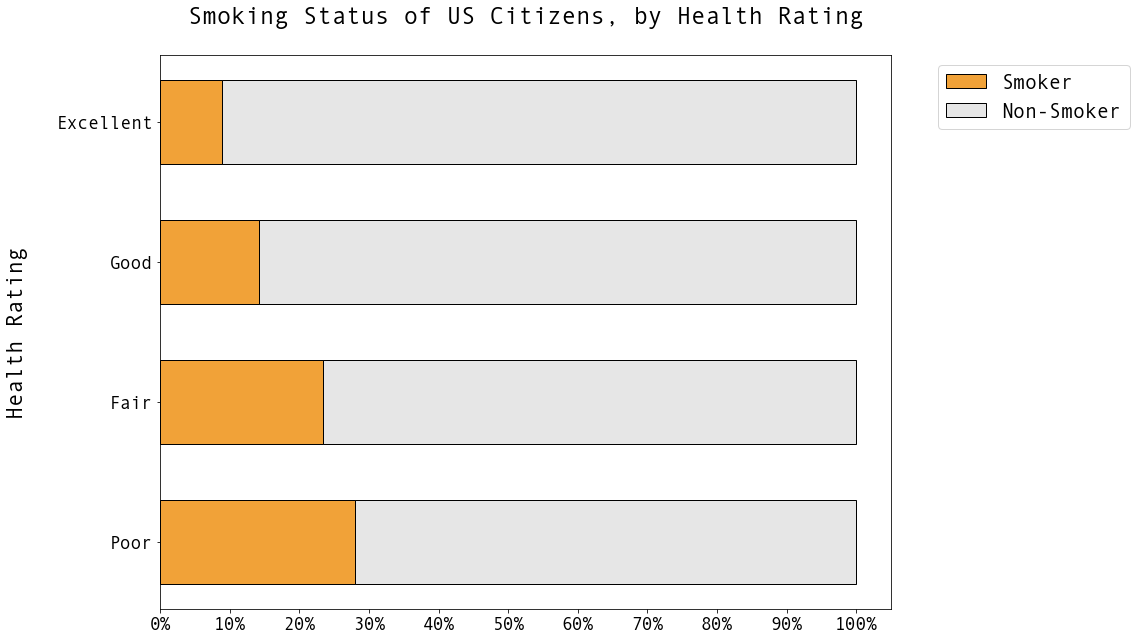

In [12]:
order = ['Poor',"Fair", "Good", 'Excellent']

df_groupby_health_rating = df_groupby_health_rating.loc[order] #re-order the df


#get values for each health rating and threshold level:
#Excellent
excellent_smoker = df_groupby_health_rating['Current Smoker']['Excellent']
excellent_non_smoker = df_groupby_health_rating['Non-Smoker']['Excellent']
total_excellent_smoke_status = excellent_smoker + excellent_non_smoker

#Good
good_smoker = df_groupby_health_rating['Current Smoker']['Good']
good_non_smoker = df_groupby_health_rating['Non-Smoker']['Good']
total_good_smoke_status = good_smoker + good_non_smoker

#Fair
fair_smoker = df_groupby_health_rating['Current Smoker']['Fair']
fair_non_smoker = df_groupby_health_rating['Non-Smoker']['Fair']
total_fair_smoke_status = fair_smoker + fair_non_smoker

#Poor
poor_smoker = df_groupby_health_rating['Current Smoker']['Poor']
poor_non_smoker = df_groupby_health_rating['Non-Smoker']['Poor']
total_poor_smoke_status = poor_smoker + poor_non_smoker

#labels for the graph are each health rating
label_health_rating= df_groupby_health_rating.index

#find the percentage of non-smokers for each health rating
non_smoker = [(poor_non_smoker/total_poor_smoke_status*100),
              (fair_non_smoker/total_fair_smoke_status*100),
              (good_non_smoker/total_good_smoke_status*100),
              (excellent_non_smoker/total_excellent_smoke_status*100)]

#find the percentage of smokers for each health rating
current_smoker = [(poor_smoker/total_poor_smoke_status*100),
              (fair_smoker/total_fair_smoke_status*100),
              (good_smoker/total_good_smoke_status*100),
              (excellent_smoker/total_excellent_smoke_status*100)]




width = .6   
fig, ax = plt.subplots(figsize=(16, 9))

#create horizontal bar for smokers in each sleep rating
ax.barh(label_health_rating,
        current_smoker,
        width,
        label='Smoker',
        color='#F1A238',
        edgecolor='black')

#create horizontal bar for non-smokers in each sleep rating
ax.barh(label_health_rating,
        non_smoker,
        width,
        left=current_smoker,  #base of this bar chart is the end of the other bar
        label='Non-Smoker',
        color='#e6e6e6',
        edgecolor='black')

ax.set_title('Smoking Status of US Citizens, by Health Rating\n',fontsize = 24,fontfamily = 'Andale Mono')

ax.xaxis.set_tick_params(labelsize=18)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(np.arange(0, 100+1, 10)) 
plt.xticks(fontname = 'Andale Mono') 


ax.set_ylabel('Health Rating\n', fontsize=22,fontfamily = 'Andale Mono')
ax.yaxis.set_tick_params(labelsize=18)
plt.yticks(fontname = 'Andale Mono')

ax.legend(bbox_to_anchor=(1.05, 1),prop={'size': 20,'family':'Andale Mono'})


plt.tight_layout()

plt.savefig('../data_file/graphs/PNG/3013_health_status_smoking.png', dpi=300)
plt.savefig('../data_file/graphs/JPG/3013_health_status_smoking.jpg', dpi=300)


We can see a trend - as health ratings worsen the percentage of people who smoke gets bigger. This is undersandable and we can see that for the most part people can understand the effect that tobacco has on their health.

## Do Societal Factors Play a Role in How Much Tobacco People Use?
### Gender
First we must group our tobacco df according to different health ratings

In [13]:
df_groupby_gender = tobacco_df.groupby(['gender', 'smoking_status'])['gender'].count().unstack('smoking_status')
df_groupby_gender

smoking_status,Current Smoker,Non-Smoker
gender,,
Female,79,437
Male,68,416


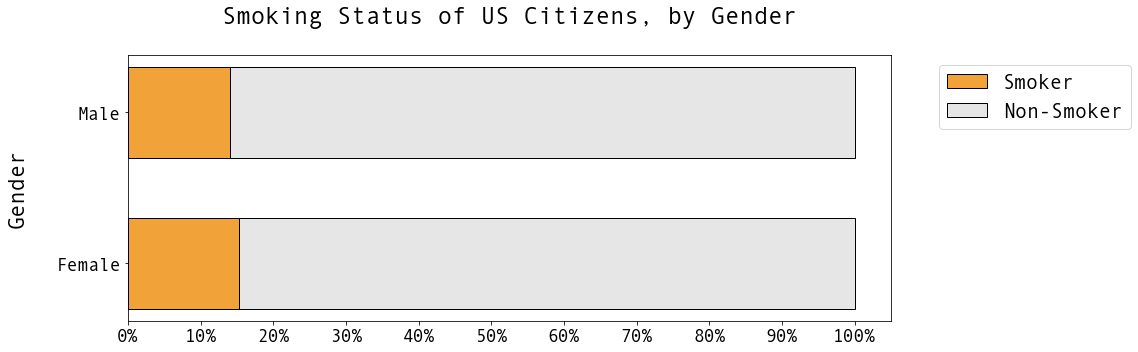

In [14]:
#get values for each gender and threshold level:
#Female
female_smoker = df_groupby_gender['Current Smoker']['Female']
female_non_smoker = df_groupby_gender['Non-Smoker']['Female']
total_female_smoke_status = female_smoker +female_non_smoker
 
#Male
male_smoker = df_groupby_gender['Current Smoker']['Male']
male_non_smoker = df_groupby_gender['Non-Smoker']['Male']
total_male_smoke_status = male_smoker +male_non_smoker

#labels for the graph are each gender
label_gender = df_groupby_gender.index

#find the percentage of non-smokers for each gender
non_smoker = [(female_non_smoker/total_female_smoke_status*100),
              (male_non_smoker/total_male_smoke_status*100)] 

#find the percentage of smokers for each gender
current_smoker = [(female_smoker/total_female_smoke_status*100),
                  (male_smoker/total_male_smoke_status*100)]

width = .6    
fig, ax = plt.subplots(figsize=(16, 5))

#create horizontal bar for smokers for each gender
ax.barh(label_gender,
        current_smoker,
        width,
        label='Smoker',
        color='#F1A238',
        edgecolor='black')

#create horizontal bar for non-smokers for each gender
ax.barh(label_gender,
        non_smoker,
        width,
        left=current_smoker, #base of this bar chart is the end of the other bar
        label='Non-Smoker',
        color='#e6e6e6',
        edgecolor='black')


ax.set_title('Smoking Status of US Citizens, by Gender\n',fontsize = 24,fontfamily = 'Andale Mono')

ax.xaxis.set_tick_params(labelsize=18)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(np.arange(0, 100+1, 10)) 
plt.xticks(fontname = 'Andale Mono') 


ax.set_ylabel('Gender\n', fontsize=22,fontfamily = 'Andale Mono')
ax.yaxis.set_tick_params(labelsize=18)
plt.yticks(fontname = 'Andale Mono')

ax.legend(bbox_to_anchor=(1.05, 1),prop={'size': 20,'family':'Andale Mono'})


plt.tight_layout()

plt.savefig('../data_file/graphs/PNG/3013_gender_smoking.png', dpi=300)
plt.savefig('../data_file/graphs/JPG/3013_gender_smoking.jpg', dpi=300)


### Education Level
We must group our tobacco df according to different genders

In [15]:
df_groupby_education = tobacco_df.groupby(['education_level', 'smoking_status'])['annual_household_income'].size().unstack('smoking_status')
df_groupby_education

smoking_status,Current Smoker,Non-Smoker
education_level,,
>Bachelor's Degree,4,35
Associate's Degree,20,79
Bachelor's Degree,38,291
Doctorate Degree,1,32
GED,7,3
Highschool,22,86
Master's Degree,2,153
Refused,1,4
Some College,40,155


Some of these education levels are too vague so we want to only focus on the main ones. We will drop the ones we don't want to use.

In [16]:
df_groupby_education = df_groupby_education.drop([">Bachelor's Degree", "Associate's Degree", "GED",'Refused','Some College'])
df_groupby_education

smoking_status,Current Smoker,Non-Smoker
education_level,,
Bachelor's Degree,38,291
Doctorate Degree,1,32
Highschool,22,86
Master's Degree,2,153
Some Highschool,12,15


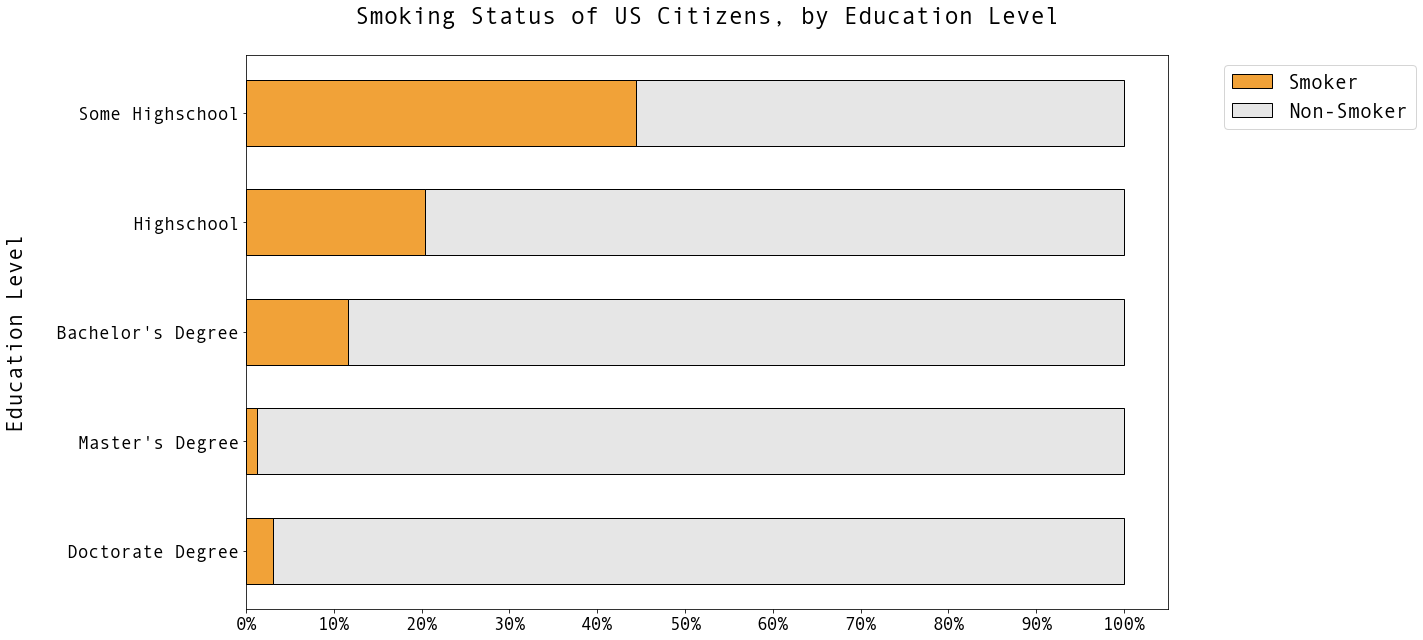

In [17]:
order = ['Doctorate Degree',"Master's Degree", "Bachelor's Degree", 'Highschool','Some Highschool']

df_groupby_education = df_groupby_education.loc[order] #re-order the df

#get values for each education level and threshold level:
#Some Highschool
some_highschool_smoker = df_groupby_education['Current Smoker']['Some Highschool']
some_highschool_non_smoker = df_groupby_education['Non-Smoker']['Some Highschool']
total_some_highschool_smoke_status = some_highschool_smoker + some_highschool_non_smoker
 
#Highschool
highschool_smoker = df_groupby_education['Current Smoker']['Highschool']
highschool_non_smoker = df_groupby_education['Non-Smoker']['Highschool']
total_highschool_smoke_status = highschool_smoker +highschool_non_smoker

#Bachelor's Degree
bachelor_smoker = df_groupby_education['Current Smoker']["Bachelor's Degree"]
bachelor_non_smoker = df_groupby_education['Non-Smoker']["Bachelor's Degree"]
total_bachelor_smoke_status = bachelor_smoker +bachelor_non_smoker

#Master's Degree
master_smoker = df_groupby_education['Current Smoker']["Master's Degree"]
master_non_smoker = df_groupby_education['Non-Smoker']["Master's Degree"]
total_master_smoke_status = master_smoker +master_non_smoker

#Doctorate Degree
doctorate_smoker = df_groupby_education['Current Smoker']['Doctorate Degree']
doctorate_non_smoker = df_groupby_education['Non-Smoker']['Doctorate Degree']
total_doctorate_smoke_status = doctorate_smoker +doctorate_non_smoker

#labels for the graph are each education level
label_education = df_groupby_education.index

#find the percentage of non-smokers for each educational level
non_smoker = [(doctorate_non_smoker/total_doctorate_smoke_status*100),
              (master_non_smoker/total_master_smoke_status*100),
              (bachelor_non_smoker/total_bachelor_smoke_status*100),
              (highschool_non_smoker/total_highschool_smoke_status*100),
              (some_highschool_non_smoker/total_some_highschool_smoke_status*100)]

#find the percentage of smokers for each educational level
current_smoker = [(doctorate_smoker/total_doctorate_smoke_status*100),
                  (master_smoker/total_master_smoke_status*100),
                  (bachelor_smoker/total_bachelor_smoke_status*100),
                  (highschool_smoker/total_highschool_smoke_status*100),
                  (some_highschool_smoker/total_some_highschool_smoke_status*100)]


width = .6   
fig, ax = plt.subplots(figsize=(20, 9))

#create horizontal bar for smokers for each education level
ax.barh(label_education, current_smoker, width, label='Smoker',color='#F1A238',edgecolor='black')


#create horizontal bar for non-smokers for each education level
ax.barh(label_education, non_smoker, width,  left=current_smoker,label='Non-Smoker',color='#e6e6e6',edgecolor='black')


ax.set_title('Smoking Status of US Citizens, by Education Level\n',fontsize = 24,fontfamily = 'Andale Mono')

ax.xaxis.set_tick_params(labelsize=18)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(np.arange(0, 100+1, 10)) 
plt.xticks(fontname = 'Andale Mono') 


ax.set_ylabel('Education Level\n', fontsize=22,fontfamily = 'Andale Mono')
ax.yaxis.set_tick_params(labelsize=18)
plt.yticks(fontname = 'Andale Mono')

ax.legend(bbox_to_anchor=(1.05, 1),prop={'size': 20,'family':'Andale Mono'})


plt.tight_layout()

plt.savefig('../data_file/graphs/PNG/3013_education_smoking.png', dpi=300)
plt.savefig('../data_file/graphs/JPG/3013_education_smoking.jpg', dpi=300)



## Household Income
We must group our tobacco df according to annual wage brackets

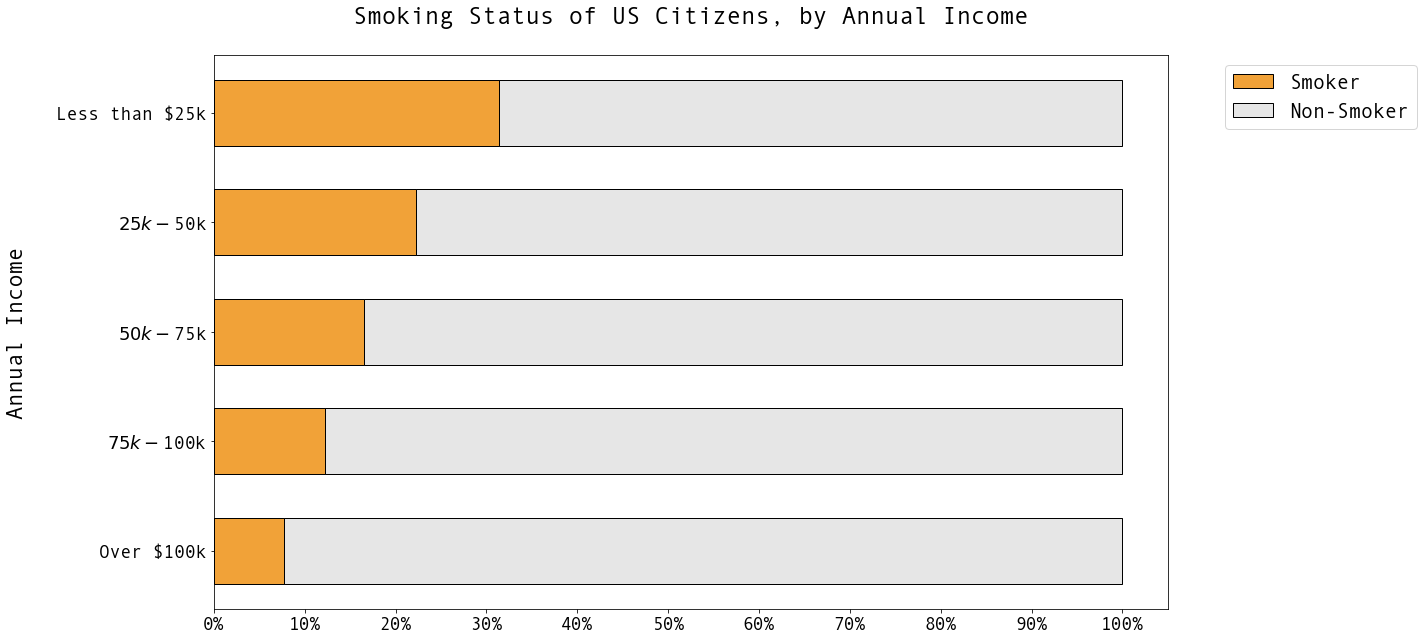

In [18]:
df_groupby_income = tobacco_df.groupby(['annual_household_income', 'smoking_status'])['annual_household_income'].size().unstack('smoking_status')


df_groupby_income = df_groupby_income.drop(['Refused',"Don't Know"])

order = ['Over $100k','$75k-$100k', '$50k-$75k', '$25k-$50k', 'Less than $25k']

df_groupby_income = df_groupby_income.loc[order] #re-order the df

#get values for each income bracket and threshold level:
#Less than $25k
lt_25k_smoker = df_groupby_income['Current Smoker']['Less than $25k']
lt_25k_non_smoker = df_groupby_income['Non-Smoker']['Less than $25k']
total_lt_25k_smoke_status = lt_25k_smoker + lt_25k_non_smoker

#$25k-$50k
_25k_50k_smoker = df_groupby_income['Current Smoker']['$25k-$50k']
_25k_50k_non_smoker = df_groupby_income['Non-Smoker']['$25k-$50k']
total_25k_50k_smoke_status = _25k_50k_smoker +_25k_50k_non_smoker

#$50k-$75k
_50k_75k_smoker = df_groupby_income['Current Smoker']['$50k-$75k']
_50k_75k_non_smoker = df_groupby_income['Non-Smoker']['$50k-$75k']
total_50k_75k_smoke_status = _50k_75k_smoker + _50k_75k_non_smoker

#$75k-$100k
_75k_100k_smoker = df_groupby_income['Current Smoker']['$75k-$100k']
_75k_100k_non_smoker = df_groupby_income['Non-Smoker']['$75k-$100k']
total_75k_100k_smoke_status = _75k_100k_smoker +_75k_100k_non_smoker

#Over $100k
over_100k_smoker = df_groupby_income['Current Smoker']['Over $100k']
over_100k_non_smoker = df_groupby_income['Non-Smoker']['Over $100k']
total_over_100k_smoke_status = over_100k_smoker +over_100k_non_smoker


#labels for the graph are each income bracket
label_income = df_groupby_income.index

#find the percentage of non-smokers for each income bracket
non_smoker = [(over_100k_non_smoker/total_over_100k_smoke_status*100),              
              (_75k_100k_non_smoker/total_75k_100k_smoke_status*100),
              (_50k_75k_non_smoker/total_50k_75k_smoke_status*100),
              (_25k_50k_non_smoker/total_25k_50k_smoke_status*100),
              (lt_25k_non_smoker/total_lt_25k_smoke_status*100)]

#find the percentage of smokers for each income bracket
current_smoker = [(over_100k_smoker/total_over_100k_smoke_status*100),
                  (_75k_100k_smoker/total_75k_100k_smoke_status*100),
                  (_50k_75k_smoker/total_50k_75k_smoke_status*100),
                  (_25k_50k_smoker/total_25k_50k_smoke_status*100),
                  (lt_25k_smoker/total_lt_25k_smoke_status*100)]


width = .6   
fig, ax = plt.subplots(figsize=(20, 9))

#create horizontal bar for smokers for each income bracket
ax.barh(label_income,
        current_smoker, 
        width, 
        label='Smoker',
        color='#F1A238',
        edgecolor='black')


#create horizontal bar for non-smokers for each income bracket
ax.barh(label_income,
        non_smoker, 
        width,  
        left=current_smoker,
        label='Non-Smoker',
        color='#e6e6e6',
        edgecolor='black')


ax.set_title('Smoking Status of US Citizens, by Annual Income\n',fontsize = 24,fontfamily = 'Andale Mono')

ax.xaxis.set_tick_params(labelsize=18)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(np.arange(0, 100+1, 10)) 
plt.xticks(fontname = 'Andale Mono') 


ax.set_ylabel('Annual Income\n', fontsize=22,fontfamily = 'Andale Mono')
ax.yaxis.set_tick_params(labelsize=18)
plt.yticks(fontname = 'Andale Mono')

ax.legend(bbox_to_anchor=(1.05, 1),prop={'size': 20,'family':'Andale Mono'})


plt.tight_layout()

plt.savefig('../data_file/graphs/PNG/3013_income_smoking.png', dpi=300)
plt.savefig('../data_file/graphs/JPG/3013_income_smoking.jpg', dpi=300)



## Race
We must group our tobacco df according to race

In [19]:
df_groupby_race = tobacco_df.groupby(['race', 'smoking_status'])['race'].count().unstack('smoking_status')
df_groupby_race

smoking_status,Current Smoker,Non-Smoker
race,,
American Indian,2.0,3.0
Asian,7.0,41.0
Black/African-American,20.0,68.0
Don't Know,NaN,1.0
Hispanic/Latino,1.0,18.0
Other,2.0,2.0
Pacific Islander,NaN,2.0
Refused,2.0,16.0
White/Caucasian,113.0,702.0


Firstly we want to remove "Don't Know" and "Refused" as these are not races. As well as this, ome of these races have no entries ("Pacific Islander") or are too vague ("Other").We will drop the ones we won't be using.

In [20]:
df_groupby_race = df_groupby_race.drop(['Refused',"Don't Know",'Pacific Islander','Other'])
df_groupby_race

smoking_status,Current Smoker,Non-Smoker
race,,
American Indian,2.0,3.0
Asian,7.0,41.0
Black/African-American,20.0,68.0
Hispanic/Latino,1.0,18.0
White/Caucasian,113.0,702.0


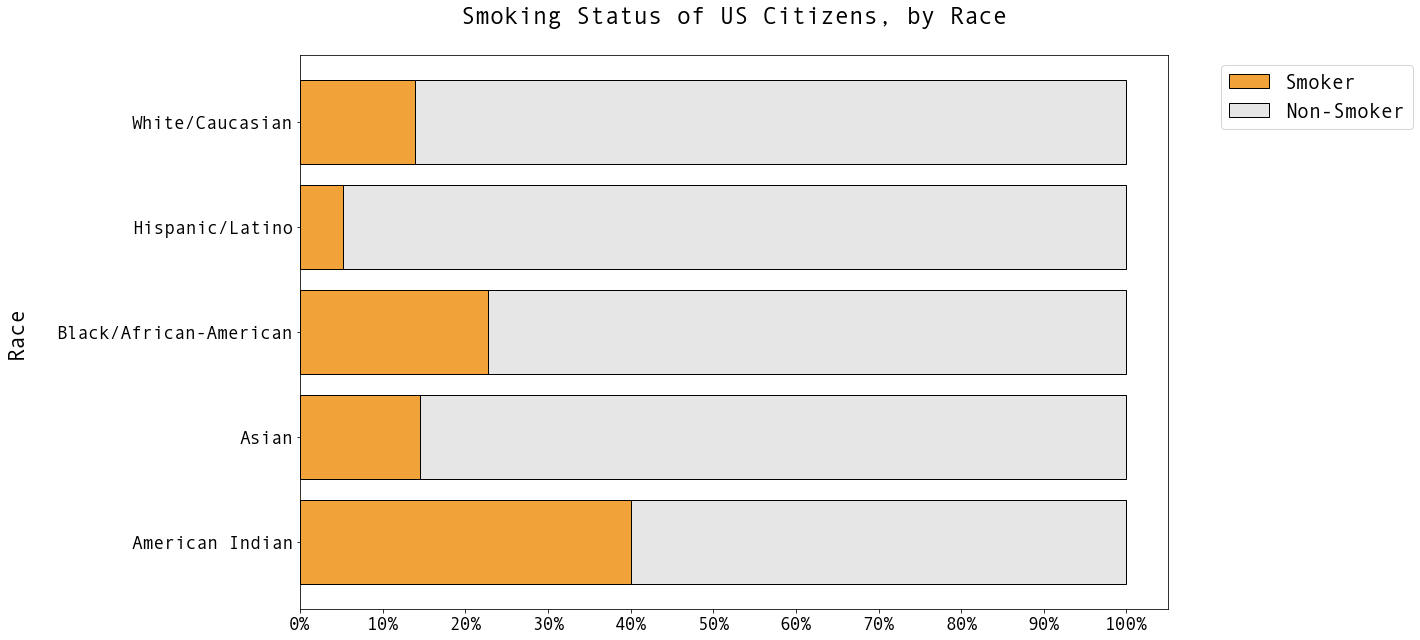

In [21]:
#get values for each education level and threshold level:
#American Indian
american_indian_smoker = df_groupby_race['Current Smoker']['American Indian']
american_indian_non_smoker = df_groupby_race['Non-Smoker']['American Indian']
total_american_indian_smoke_status = american_indian_smoker + american_indian_non_smoker

#Asian
asian_smoker = df_groupby_race['Current Smoker']['Asian']
asian_non_smoker = df_groupby_race['Non-Smoker']['Asian']
total_asian_smoke_status = asian_smoker +asian_non_smoker

#Black/African-American
black_smoker = df_groupby_race['Current Smoker']['Black/African-American']
black_non_smoker = df_groupby_race['Non-Smoker']['Black/African-American']
total_black_smoke_status = black_smoker + black_non_smoker

#Hispanic/Latino
hispanic_smoker = df_groupby_race['Current Smoker']['Hispanic/Latino']
hispanic_non_smoker = df_groupby_race['Non-Smoker']['Hispanic/Latino']
total_hispanic_smoke_status = hispanic_smoker +hispanic_non_smoker

#White/Caucasian
white_smoker = df_groupby_race['Current Smoker']['White/Caucasian']
white_non_smoker = df_groupby_race['Non-Smoker']['White/Caucasian']
total_white_smoke_status = white_smoker + white_non_smoker

#labels for the graph are different races
label_race = df_groupby_race.index

#find the percentage of non-smokers for each race
non_smoker = [(american_indian_non_smoker/total_american_indian_smoke_status*100),
              (asian_non_smoker/total_asian_smoke_status*100),
              (black_non_smoker/total_black_smoke_status*100),
              (hispanic_non_smoker/total_hispanic_smoke_status*100),
              (white_non_smoker/total_white_smoke_status*100)]

#find the percentage of smokers for each race
current_smoker = [(american_indian_smoker/total_american_indian_smoke_status*100),
                  (asian_smoker/total_asian_smoke_status*100),
                  (black_smoker/total_black_smoke_status*100),
                  (hispanic_smoker/total_hispanic_smoke_status*100),
                  (white_smoker/total_white_smoke_status*100)]

width = .8    
fig, ax = plt.subplots(figsize=(20, 9))


#create horizontal bar for smokers for each race
ax.barh(label_race, 
        current_smoker, 
        width, 
        label='Smoker',
        color='#F1A238',
        edgecolor='black')

#create horizontal bar for non-smokers for each race
ax.barh(label_race, 
        non_smoker, 
        width,  
        left=current_smoker,
        label='Non-Smoker',
        color='#e6e6e6',
        edgecolor='black')






ax.set_title('Smoking Status of US Citizens, by Race\n',fontsize = 24,fontfamily = 'Andale Mono')

ax.xaxis.set_tick_params(labelsize=18)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(np.arange(0, 100+1, 10)) 
plt.xticks(fontname = 'Andale Mono') 


ax.set_ylabel('Race\n', fontsize=22,fontfamily = 'Andale Mono')
ax.yaxis.set_tick_params(labelsize=18)
plt.yticks(fontname = 'Andale Mono')

ax.legend(bbox_to_anchor=(1.05, 1),prop={'size': 20,'family':'Andale Mono'})


plt.tight_layout()

plt.savefig('../data_file/graphs/PNG/3013_race_smoking.png', dpi=300)
plt.savefig('../data_file/graphs/JPG/3013_race_smoking.jpg', dpi=300)


## Apply the Cluster Groups to the Relevant Data

In [30]:
mod = '../data_file/cleaned_data_pickle/cluster_oriented_2013_poll.pickle'
cluster_df = pd.read_pickle(mod)

In [31]:
cluster_df

,id,age,employment_status,gender,state,bed_time_weekdays,wake_up_weekdays,bed_time_wrong,wake_up_wrong,time_awake_wrong,...,hispanic,race,bed_time_weekend_wrong,wake_up_weekend_wrong,total_height_inch,bmi,regions,age_bin,bmi_bin,cluster_group
0,1,39,3,Male,CO,14,17,1000.0,2050.0,1050.0,...,2,White/Caucasian,1000.0,2050.0,73.0,20.98,West,30-40,20-25,2.0
1,2,57,1,Female,AL,10,7,900.0,1800.0,900.0,...,2,White/Caucasian,2100.0,2100.0,69.0,34.70,South,50-60,30-35,4.0
2,3,51,1,Male,NV,14,9,1000.0,1850.0,850.0,...,2,White/Caucasian,1000.0,1900.0,74.0,25.03,West,50-60,25-30,6.0
3,3,38,1,Male,FL,15,10,1025.0,1875.0,850.0,...,2,White/Caucasian,1100.0,2000.0,71.0,NaN,South,NaN,NaN,NaN
4,4,60,1,Male,CT,18,8,1100.0,1825.0,725.0,...,2,White/Caucasian,1100.0,2050.0,69.0,22.89,Northeast,50-60,20-25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,956,43,2,Female,NY,18,15,1100.0,2000.0,900.0,...,2,White/Caucasian,1100.0,2000.0,64.0,19.39,Northeast,40-50,15-20,NaN
996,959,26,1,Male,NY,2,13,1201.7,1950.0,748.3,...,2,White/Caucasian,1400.0,2200.0,63.0,23.03,Northeast,20-30,20-25,2.0
997,963,45,1,Female,NY,18,11,1100.0,1900.0,800.0,...,2,White/Caucasian,1200.0,2050.0,67.0,22.86,Northeast,40-50,20-25,NaN
998,964,53,1,Male,NE,16,7,1050.0,1800.0,750.0,...,2,White/Caucasian,1050.0,1900.0,70.0,30.13,Midwest,50-60,30-35,3.0


In [32]:
tobacco_df['cluster_group'] = cluster_df['cluster_group']

In [33]:
tobacco_cluster_df = tobacco_df.groupby(['cluster_group', 'smoking_status'])['cluster_group'].count().unstack('smoking_status')

In [34]:
tobacco_cluster_df['cluster_tobacco_threshold_percent'] = tobacco_cluster_df['Current Smoker']/(tobacco_cluster_df['Non-Smoker']+tobacco_cluster_df['Non-Smoker'])

In [35]:
tobacco_cluster_df.sort_values(['cluster_tobacco_threshold_percent'], ascending=False, inplace=True)

In [36]:
tobacco_cluster_df.to_pickle('../data_file/cleaned_data_pickle/tobacco_cluster_results.pickle')

## Save the Results to a PICKLE File

In [37]:
tobacco_df.to_pickle('../data_file/cleaned_data_pickle/tobacco_dataframe_results.pickle')